<a href="https://colab.research.google.com/github/Miguel31Sa/Inteligencia-Artificial-MASS/blob/main/Perceptron_Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Práctica 3 - Adaline multicapa Fuente de datos personal

Para esta práctica de igual manera utilice Lenses ya que en la misma pagina que me habia tocado ninguno tenia el archivo que se utiliza para hacer las practicas por lo que mejor opte en utilizar el mismo que la práctica anterior

<ipython-input-3-d6487bd2714b>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, header=None, delim_whitespace=True)


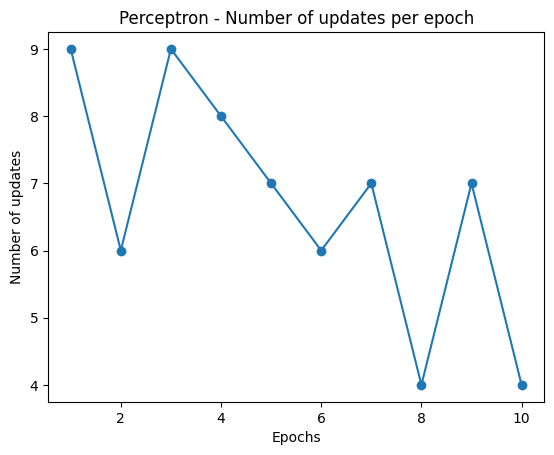

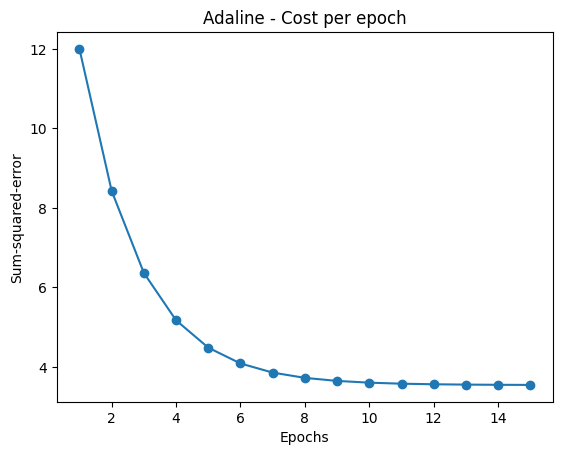

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el conjunto de datos de lentes desde la URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data'
df = pd.read_csv(url, header=None, delim_whitespace=True)

# Separar las características (X) y las etiquetas (y)
X = df.iloc[:, 1:5].values  # las características son las columnas 1 a 4
y = df.iloc[:, 5].values  # la etiqueta es la columna 5

# Convertir etiquetas de clase a valores binarios (por ejemplo, convertir 1 y 2 a -1 y 1)
y = np.where(y == 1, -1, 1)

# Definición de la clase Perceptrón
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        self.w_ = None
        self.errors_ = []

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  # Inicializar pesos
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Definición de la clase Adaline
class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        self.w_ = None
        self.cost_ = []

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  # Inicializar pesos
        for _ in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Entrenamiento del Perceptrón
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Visualizar el número de errores por época en Perceptrón
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron - Number of updates per epoch')
plt.show()

# Entrenamiento del Adaline
ada = AdalineGD(n_iter=15, eta=0.01)

# Estandarizar las características
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# Entrenar el modelo de Adaline
ada.fit(X_std, y)

# Visualizar el costo a través de las épocas en Adaline
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Cost per epoch')
plt.show()
